In [21]:
import pandas as pd

In [24]:
loan = pd.read_csv('/Users/sripadma/Desktop/Data science/Data/Regression/loan.csv')

In [25]:
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [27]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


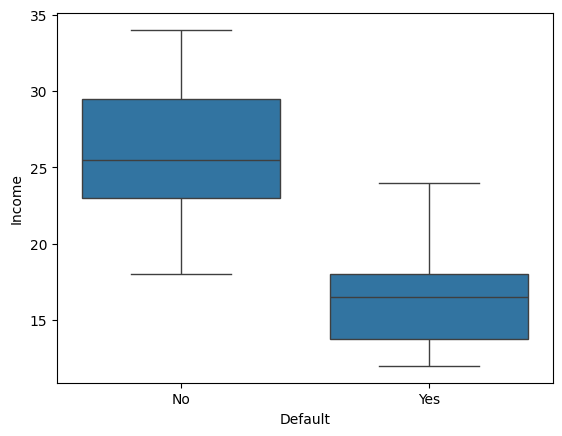

In [29]:
ax = sns.boxplot(data= loan, x = 'Default', y = 'Income')

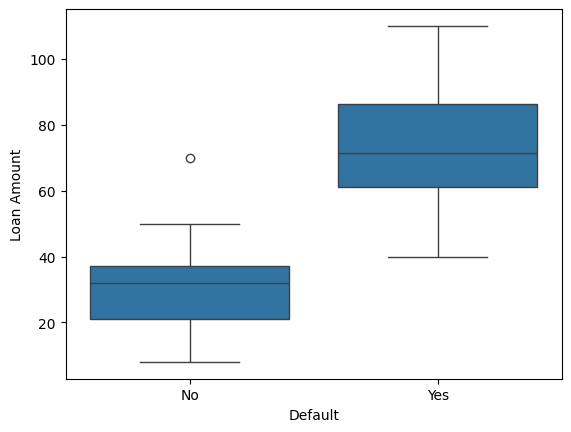

In [30]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

In [31]:
# scaterrplot
import numpy as np

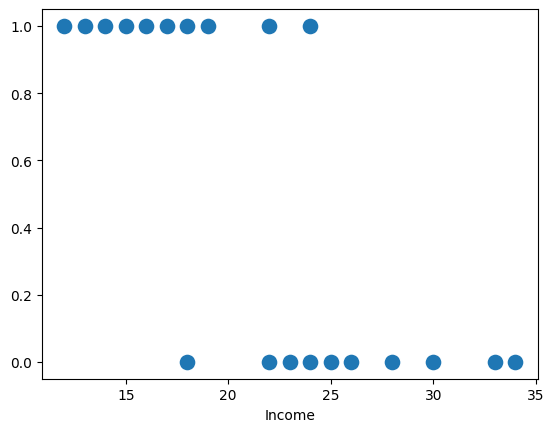

In [32]:
ax = sns.scatterplot(x = loan['Income'], y= np.where(loan['Default'] =='No',0,1), s = 150)

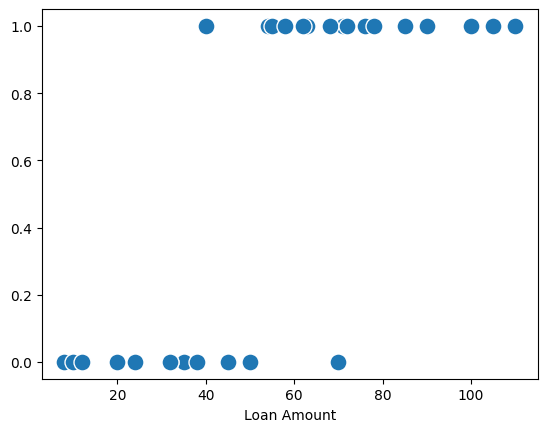

In [34]:
ax = sns.scatterplot(x= loan['Loan Amount'], y = np.where(loan['Default']=='No',0,1), s = 150)

In [35]:
#prepare the Data
y = loan['Default']

In [42]:
x = loan[['Income','Loan Amount']]

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7, stratify= y, random_state= 123)

In [51]:
x_train.shape

(21, 2)

In [52]:
x_test.shape

(9, 2)

In [55]:
# train and evaluate the model
from sklearn.linear_model import LogisticRegression


In [56]:
classifier = LogisticRegression()

In [57]:
model = classifier.fit(x_train, y_train)

In [58]:
model.predict(x_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype=object)

In [59]:
model.score(x_test, y_test)

0.8888888888888888

In [63]:
#accuracy for confumatrix
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test, model.predict(x_test))

array([[3, 1],
       [0, 5]])

In [65]:
#interpret the model
model.intercept_

array([15.4670632])

In [66]:
model.coef_

array([[-1.0178107 ,  0.14656096]])

In [67]:
# convert 2d-1d with 2 decimal values
log_odds = np.round(model.coef_[0],2)
log_odds

array([-1.02,  0.15])

In [68]:
pd.DataFrame({'log odds': log_odds},index = x.columns)

,log odds
Income,-1.02
Loan Amount,0.15


In [69]:
odds = np.round(np.exp(log_odds),2)
pd.DataFrame({'odds': odds},index = x.columns)

,odds
Income,0.36
Loan Amount,1.16
